<a href="https://www.kaggle.com/code/subarnasaikia/sticker-and-learning-ml-part-2?scriptVersionId=218827227" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Forecasting Sticker Sales

This notebook will document what I am learning during the competitions. I will also include the resources I am using to complete the project.

## Learning Resources:

- [Numpy Documentation](https://numpy.org/devdocs/user/index.html#user)
- [Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)

## Import the necessary libraries.

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import os

# data visualizaion libraries
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# model training libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error , mean_squared_error, r2_score


print("Libraries are imported!!!")

Libraries are imported!!!


In [2]:
filePath_train = "/kaggle/input/playground-series-s5e1/train.csv"
filePath_test = "/kaggle/input/playground-series-s5e1/test.csv"
filePath_sample_submission = "/kaggle/input/playground-series-s5e1/sample_submission.csv"


train_df = pd.read_csv(filePath_train)
test_df = pd.read_csv(filePath_test)
sample_submission_df = pd.read_csv(filePath_sample_submission)
print("DataFrame created!")

DataFrame created!


In [3]:
print("Top 5 data of train_df:")
print(train_df.head(5))
print("\n\nTop 5 data of test_df:")
print(test_df.head(5))

Top 5 data of train_df:
   id        date country              store             product  num_sold
0   0  2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1   1  2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2   2  2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3   3  2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4   4  2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0


Top 5 data of test_df:
       id        date country              store             product
0  230130  2017-01-01  Canada  Discount Stickers   Holographic Goose
1  230131  2017-01-01  Canada  Discount Stickers              Kaggle
2  230132  2017-01-01  Canada  Discount Stickers        Kaggle Tiers
3  230133  2017-01-01  Canada  Discount Stickers            Kerneler
4  230134  2017-01-01  Canada  Discount Stickers  Kerneler Dark Mode


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [5]:
columnsName = list(train_df.columns)
print(columnsName)

['id', 'date', 'country', 'store', 'product', 'num_sold']


In [6]:
print("Unique items:\n")
train_df.nunique()

Unique items:



id          230130
date          2557
country          6
store            3
product          5
num_sold      4037
dtype: int64

### Checking the empty fields.

We can see from the below that there are 8871 empty field in the num_sold.

In [7]:
print("Emptry Fields:")
train_df.isnull().sum()

Emptry Fields:


id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [8]:
train_df.describe()

,id,num_sold
count,230130.000000,221259.000000
mean,115064.500000,752.527382
std,66432.953062,690.165445
min,0.000000,5.000000
25%,57532.250000,219.000000
50%,115064.500000,605.000000
75%,172596.750000,1114.000000
max,230129.000000,5939.000000


In [9]:
train_df.describe(include='object')

,date,country,store,product
count,230130,230130,230130,230130
unique,2557,6,3,5
top,2010-01-01,Canada,Discount Stickers,Holographic Goose
freq,90,38355,76710,46026


## Data Visualization!

## EDA

```
Below codes are given by the chatgpt. As I'm currently learning, I'm using ChatGPT to get started with competition. I will also add why each steps are used here, If I don't know will share what chatGPT saying about it.
```

> I am currently adding other data visualizations technique to analyse the data 


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


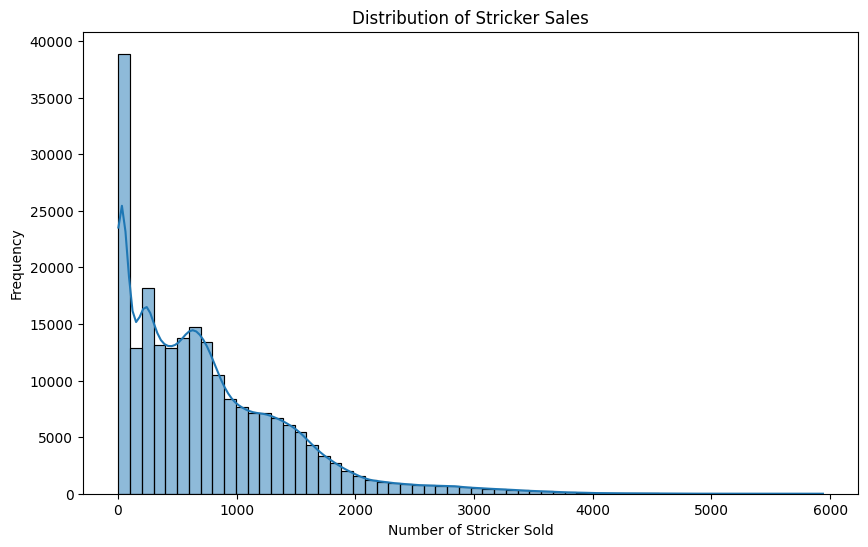

In [10]:
# Examining the Distribution of Sales (num_sold)
plt.figure(figsize=(10,6))
sns.histplot(train_df['num_sold'], bins=60, kde=True)
plt.title("Distribution of Stricker Sales")
plt.xlabel("Number of Stricker Sold")
plt.ylabel("Frequency")
plt.show()

From the above, we can see that the number of Stricker sold is less then fequency is more.

### Time Series Analysis

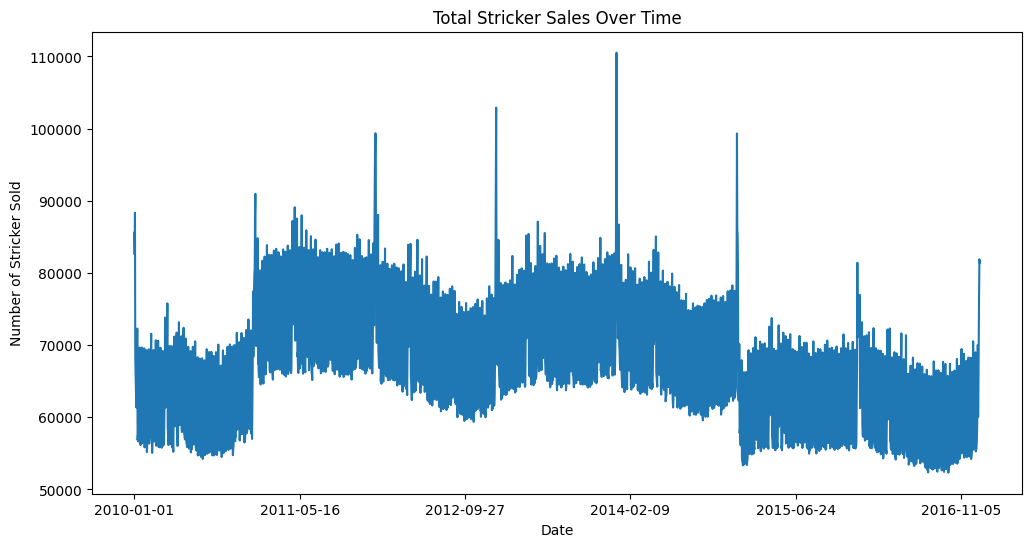

In [11]:
# Ploting num_sold over time to observe trends.
plt.figure(figsize=(12,6))
train_df.groupby('date')['num_sold'].sum().plot()
plt.title('Total Stricker Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stricker Sold')
plt.show()

## Analyzing Categorical Variables
- Checking how sales are distributed accross different countries, stores, and items.

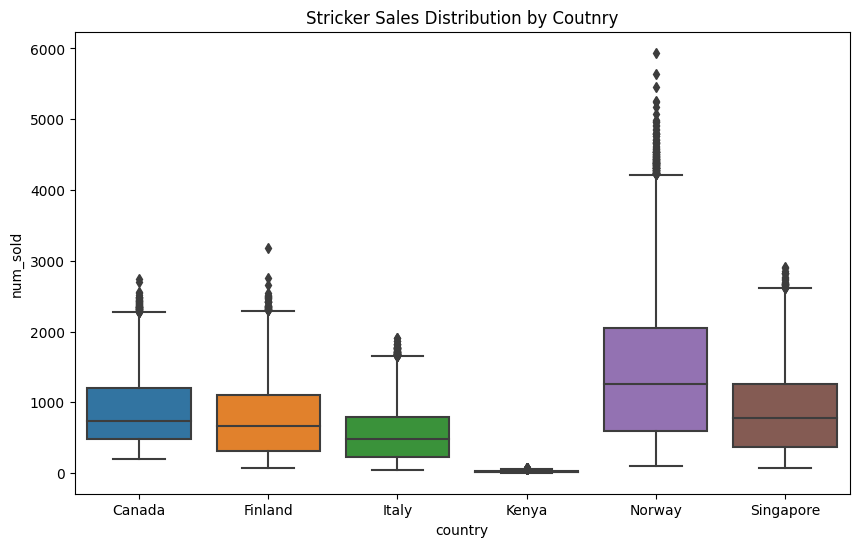

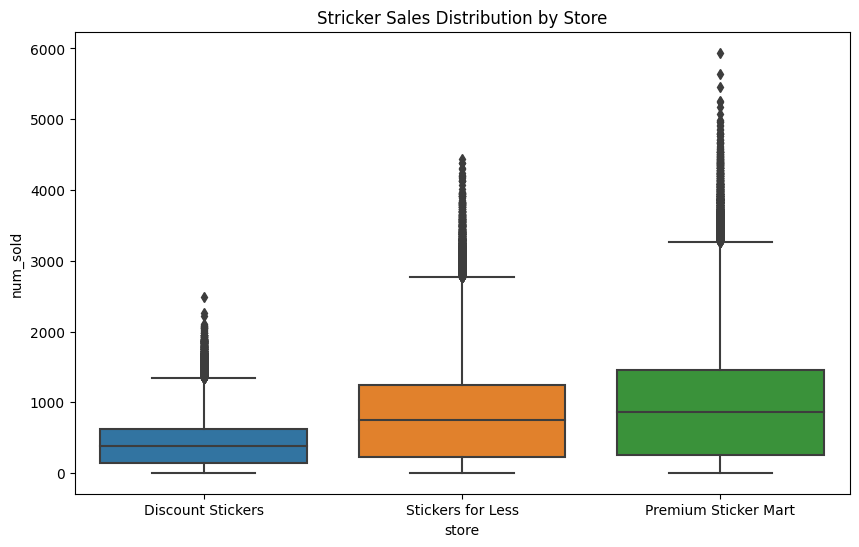

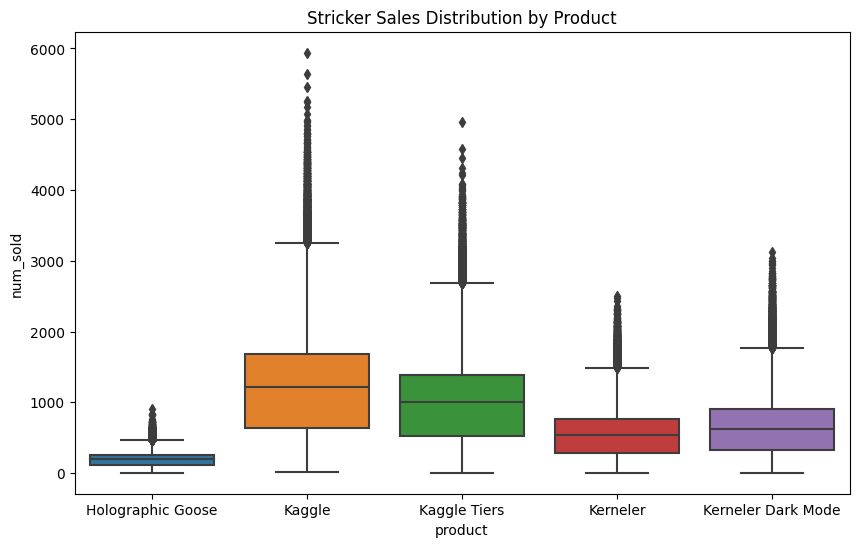

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='country', y='num_sold', data=train_df)
plt.title('Stricker Sales Distribution by Coutnry')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='store', y='num_sold', data=train_df)
plt.title('Stricker Sales Distribution by Store')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='product', y='num_sold', data=train_df)
plt.title('Stricker Sales Distribution by Product')
plt.show()

### Checking for Seasonal Trends
- Extract the day of the week from the date and plot the sales

## Feature Engineering

### Date Features:

In [13]:
def featureEngineering(data):
    data['date'] = pd.to_datetime(data['date'])
    data['day_of_week'] = data['date'].dt.dayofweek
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day

    # Handling missing values
    if 'num_sold' in list(data.columns):
        data['num_sold'] = data.groupby(['country', 'store', 'product'])['num_sold'].transform(
            lambda x: x.fillna(x.median())
        )
        overall_median = data['num_sold'].median()
        data['num_sold'].fillna(overall_median, inplace=True)

    data.fillna(0.1, inplace=True)

    # Hotencoding
    data = pd.get_dummies(data, columns=['country', 'store', 'product'])

    return data
    

In [14]:
train_df = featureEngineering(train_df)
test_df = featureEngineering(test_df)

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


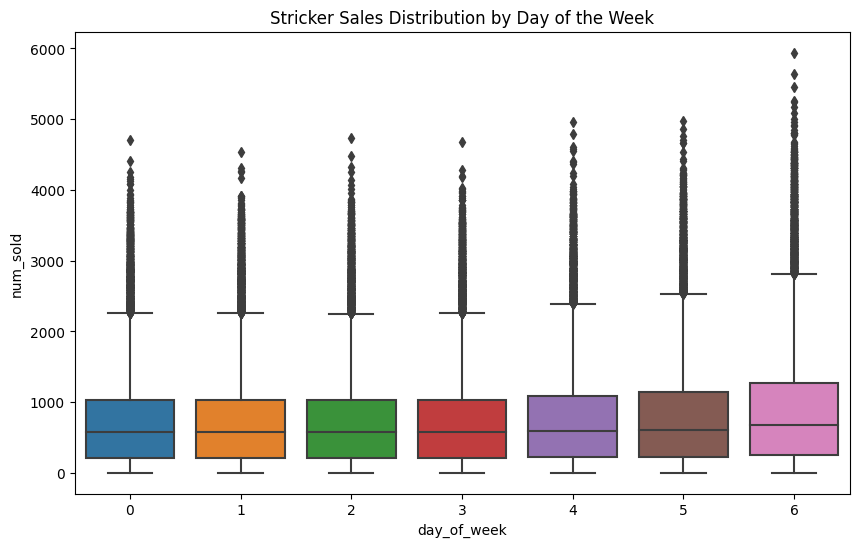

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day_of_week', y='num_sold', data=train_df)
plt.title('Stricker Sales Distribution by Day of the Week')
plt.show()

In [16]:
print("Top 5 data of train_df:")
train_df.head(5)

Top 5 data of train_df:


,id,date,num_sold,day_of_week,year,month,day,country_Canada,country_Finland,country_Italy,...,country_Norway,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
0,0,2010-01-01,592.0,4,2010,1,1,True,False,False,...,False,False,True,False,False,True,False,False,False,False
1,1,2010-01-01,973.0,4,2010,1,1,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,2,2010-01-01,906.0,4,2010,1,1,True,False,False,...,False,False,True,False,False,False,False,True,False,False
3,3,2010-01-01,423.0,4,2010,1,1,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,4,2010-01-01,491.0,4,2010,1,1,True,False,False,...,False,False,True,False,False,False,False,False,False,True


In [17]:
print("\n\nTop 5 data of test_df:")
test_df.head(5)



Top 5 data of test_df:


,id,date,day_of_week,year,month,day,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
0,230130,2017-01-01,6,2017,1,1,True,False,False,False,False,False,True,False,False,True,False,False,False,False
1,230131,2017-01-01,6,2017,1,1,True,False,False,False,False,False,True,False,False,False,True,False,False,False
2,230132,2017-01-01,6,2017,1,1,True,False,False,False,False,False,True,False,False,False,False,True,False,False
3,230133,2017-01-01,6,2017,1,1,True,False,False,False,False,False,True,False,False,False,False,False,True,False
4,230134,2017-01-01,6,2017,1,1,True,False,False,False,False,False,True,False,False,False,False,False,False,True


In [18]:
train_df.isnull().sum()

id                            0
date                          0
num_sold                      0
day_of_week                   0
year                          0
month                         0
day                           0
country_Canada                0
country_Finland               0
country_Italy                 0
country_Kenya                 0
country_Norway                0
country_Singapore             0
store_Discount Stickers       0
store_Premium Sticker Mart    0
store_Stickers for Less       0
product_Holographic Goose     0
product_Kaggle                0
product_Kaggle Tiers          0
product_Kerneler              0
product_Kerneler Dark Mode    0
dtype: int64

## Spliting the Data and Model Training

### Spliting the data

In [19]:
train_set, val_set = train_test_split(train_df, test_size=0.2)

X_train = train_set.drop(['id', 'date', 'num_sold'], axis=1)
y_train = train_set['num_sold']
X_val = val_set.drop(['id', 'date', 'num_sold'], axis=1)
y_val = val_set['num_sold']

In [20]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [21]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
def printError(val, pred):
    mse = mean_squared_error(val, pred)
    r2 = r2_score(val, pred)
    mape = mean_absolute_percentage_error(val, pred)
    
    print(f'MAPE on validation set: {mape:}')
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")

In [23]:
y_pred = model.predict(X_val)
printError(y_val, y_pred)

MAPE on validation set: 0.050206530073656754
Mean Squared Error: 4765.602551481772
R² Score: 0.989631703699412


In [24]:
# # Define parameter grid
# param_grid = {
#     'n_estimators': [100, 150, 200, 250],
#     'max_depth': [None, 10, 20, 30],
#     # 'min_samples_split': [2, 5, 10],
# }

# # GridSearchCV
# grid_search = GridSearchCV(
#     estimator=RandomForestRegressor(random_state=42),
#     param_grid=param_grid,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     verbose=3,
#     n_jobs=-1
# )
# grid_search.fit(X_train, y_train)

# print(f"Best Parameters: {grid_search.best_params_}")


In [25]:
# best_model = grid_search.best_estimator_
# print(f"Best Parameters: {grid_search.best_params_}")

In [26]:
# y_pred = best_model.predict(X_val)
# printError(y_val, y_pred)

### Submission 

In [27]:
test_df.isnull().sum()

id                            0
date                          0
day_of_week                   0
year                          0
month                         0
day                           0
country_Canada                0
country_Finland               0
country_Italy                 0
country_Kenya                 0
country_Norway                0
country_Singapore             0
store_Discount Stickers       0
store_Premium Sticker Mart    0
store_Stickers for Less       0
product_Holographic Goose     0
product_Kaggle                0
product_Kaggle Tiers          0
product_Kerneler              0
product_Kerneler Dark Mode    0
dtype: int64

In [28]:
X_test = test_df.drop(['id', 'date'], axis=1)
predictions = model.predict(X_test)

In [29]:
submission = pd.DataFrame({'id': test_df['id'], 'num_sold': predictions})
submission.to_csv('submission.csv', index=False)